# Hola  Salvador &#x1F600;

Soy **Hesus Garcia**, revisor de código de Tripleten, y voy a examinar el proyecto que has desarrollado recientemente. Si encuentro algún error, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;


# Descripción

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que evalúes esa posibilidad.
- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Me parece genial que hayas incluido una tabla de contenidos en tu documento, esto facilitará la navegación y comprensión de los temas que estás tratando. ¡Sigue así!</div>
</div>


<div class="alert alert-block alert-info">
<b>Que tal Hesus Garcia es un placer esspero que ahora este correcto el proyecto con las adiciones que se hicieron, tambien ahora que se hizo la eliminacion de algunos registros en el apartado de *Clientes Similares* aparecieron ahora registros con valores nulos me podrias decir si esto esta bien o se debe cam quedo atento a tus comentarios muchas gracias.</b> <a class=“tocSkip”></a>
</div>

# Preprocesamiento y exploración de datos

## Inicialización

In [1]:
pip install scikit-learn --upgrade

  Using cached scikit_learn-1.3.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'INSTALLER'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing
from sklearn.neighbors import NearestNeighbors

from sklearn.model_selection import train_test_split
from numpy.random import RandomState
import math

from IPython.display import display

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Quería proporcionarte algunos comentarios sobre la organización de los imports en tu código. Entiendo que esto se te proporcionó como parte de una plantilla, sin embargo es importante destacar el orden de los imports. 
    
Es preferible agrupar los imports siguiendo el siguiente orden:

Imports de la biblioteca estándar de Python.
Imports de bibliotecas de terceros relacionadas.
Imports específicos de la aplicación local o biblioteca personalizada.
Para mejorar la legibilidad del código, también es recomendable dejar una línea en blanco entre cada grupo de imports, pero solo un import por línea.
Te dejo esta referencia con ejemplos:  
https://pep8.org/#imports

</div>

## Carga de datos

Carga los datos y haz una revisión básica para comprobar que no hay problemas obvios.

In [3]:
# Cargamos dataframe
df = pd.read_csv('/datasets/insurance_us.csv')

In [4]:
df.shape

(5000, 5)

Renombramos las columnas para que el código se vea más coherente con su estilo.

In [5]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [6]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
4746,0,33.0,65300.0,5,0
1138,0,25.0,30000.0,0,0
2469,1,51.0,41100.0,3,2
4014,1,34.0,43800.0,3,0
1252,0,25.0,57000.0,1,0
2674,1,28.0,46200.0,0,0
3438,0,32.0,42900.0,1,0
4940,1,39.0,42100.0,1,0
586,1,27.0,51000.0,2,0
1658,0,35.0,39100.0,2,0


A continuacion revisaremos el tipo de dato en cada columna y los cambiaremos de ser necesario.

In [7]:
# Revisamos el tipo de datos de cada columna.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [8]:
# puede que queramos cambiar el tipo de edad (de float a int) aunque esto no es crucial

# escribe tu conversión aquí si lo deseas:

df['age'] = df['age'].astype(int)

In [9]:
df.duplicated().sum()

153

In [10]:
# comprueba que la conversión se haya realizado con éxito
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


Ya tenemos los datos en el formato correcto, ahora revisaremos datos duplicados.

In [11]:
# Revisamos duplicados
df_duplicated= df[df.duplicated()]
df_duplicated

,gender,age,income,family_members,insurance_benefits
281,1,39,48100.0,1,0
488,1,24,32900.0,1,0
513,0,31,37400.0,2,0
718,1,22,32600.0,1,0
785,0,20,35800.0,0,0
...,...,...,...,...,...
4793,1,24,37800.0,0,0
4902,1,35,38700.0,1,0
4935,1,19,32700.0,0,0
4945,1,21,45800.0,0,0


In [12]:
df_duplicated.query('gender == 1')

,gender,age,income,family_members,insurance_benefits
281,1,39,48100.0,1,0
488,1,24,32900.0,1,0
718,1,22,32600.0,1,0
869,1,24,33100.0,1,0
887,1,19,35500.0,0,0
...,...,...,...,...,...
4781,1,40,37400.0,2,0
4793,1,24,37800.0,0,0
4902,1,35,38700.0,1,0
4935,1,19,32700.0,0,0


In [13]:
df_duplicated['age'].value_counts()

31    10
26    10
32    10
19    10
25     9
22     8
27     8
28     8
29     7
36     7
21     7
23     7
35     6
30     6
24     6
33     5
20     5
41     5
40     4
34     4
37     4
38     4
18     1
39     1
50     1
Name: age, dtype: int64

A primera vista no vemos los datos duplicados por lo que se revisara manualmente cada edad que es la columna con la menor canidad de datos que se repiten para ver si son en verdad valores duplicados.

In [14]:
df_duplicated.query('age == 50')

,gender,age,income,family_members,insurance_benefits
2869,0,50,24700.0,1,2


In [15]:
df_duplicated.query('age == 18')['income'].sort_values(ascending=False)

2429    39800.0
Name: income, dtype: float64

Despues de analizar nos damos cuenta de que no todos los datos que nos arroja son reales por lo que solamente borraremos las columnas que identificamos como datos duplicados reales.

In [16]:
# Eliminamos columnas con datos duplicados
df = df.drop(df.index[[2998, 2269, 1317, 1598, 3141, 1667, 2318]])
df

,gender,age,income,family_members,insurance_benefits
0,1,41,49600.0,1,0
1,0,46,38000.0,1,1
2,0,29,21000.0,0,0
3,0,21,41700.0,2,0
4,1,28,26100.0,0,0
...,...,...,...,...,...
4995,0,28,35700.0,2,0
4996,0,34,52400.0,1,0
4997,0,20,33900.0,2,0
4998,1,22,32700.0,3,0


In [17]:
# ahora echa un vistazo a las estadísticas descriptivas de los datos.# ¿Se ve todo bien?

In [18]:
df.describe()

,gender,age,income,family_members,insurance_benefits
count,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000
mean,0.499299,30.958342,39910.654917,1.194873,0.148207
std,0.500050,8.443123,9904.490139,1.091872,0.463475
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


En los datos de la tabla anterior podemos ver en los maximos que en las columnas de `age` y `gender` no tenemos datos atipicos entonces nos centraremos en las otras tres columnas `income, family_members y insurance_benefits` especialmente en esta ultima que representa nuestro target.

<AxesSubplot:>

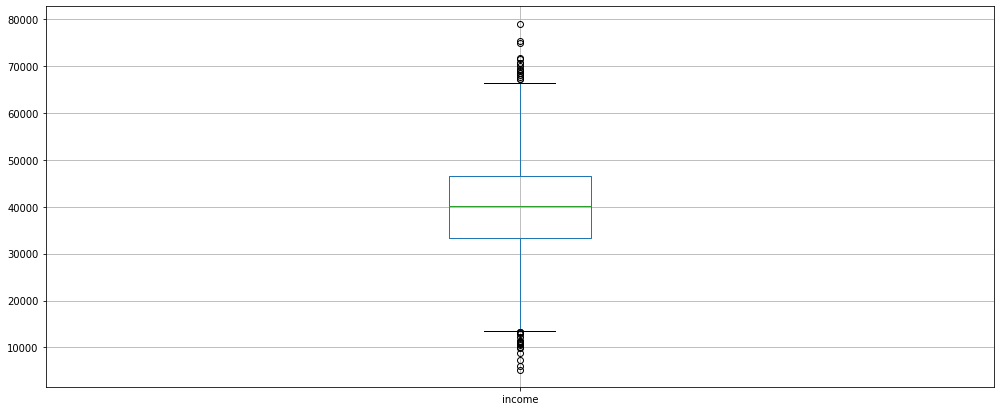

In [19]:
# Revisamos con boxplot los datos atipicos
df.boxplot(['income'], figsize=(17,7))

<AxesSubplot:>

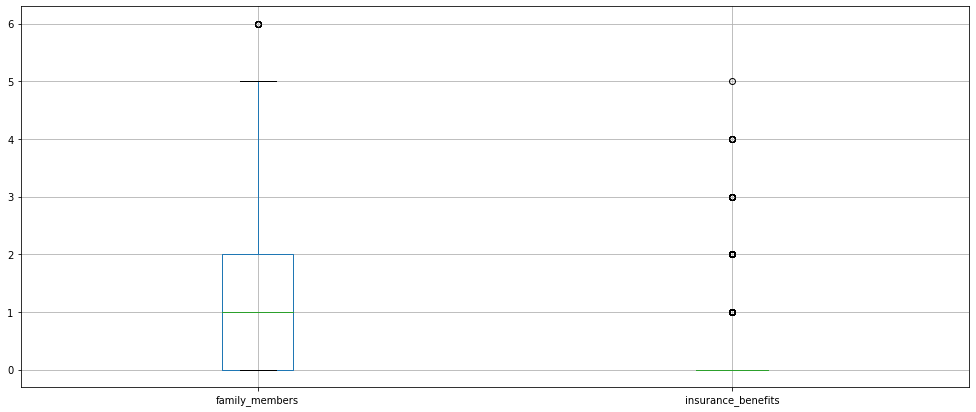

In [20]:
df.boxplot(['family_members', 'insurance_benefits'], figsize=(17,7))

En la columna `income` parece tener unos cuantos datos elevados pero que no se salen de parametros de manera significativa el caso de las columnas ``family_members y de insurance_benefits`` si son mas evide, sin embargo en el caso de `insurance_benefits` si se eliminarian los datos atipicos dependiendo de cuantos datos sean si esto no nos hace perder muchos datos.

In [21]:
df['insurance_benefits'].value_counts()

0    4429
1     423
2     115
3      18
4       7
5       1
Name: insurance_benefits, dtype: int64

In [22]:
df.query('insurance_benefits == 5')

,gender,age,income,family_members,insurance_benefits
228,1,65,39700.0,1,5


Los datos de la columna `insurance_benefits` que no afectarian tanto si son eliminados son los mayores a 3 ya que son apenas 26 registros sin embargo podemos ver que la estos son de personas mayores de 50 años por lo que tiene sentido la cantidad de seguros que tienen si embargo el registro que maneja cinco seguros puede sesgar los resultados ya que su ingreso tambien es bajo entonces solamente eliminaremos los registros con valores cuatro y cinco que son los que nos afectarian en menor medida.

In [23]:
# Filtramos dataframe
df = df.query('insurance_benefits < 4')
df

,gender,age,income,family_members,insurance_benefits
0,1,41,49600.0,1,0
1,0,46,38000.0,1,1
2,0,29,21000.0,0,0
3,0,21,41700.0,2,0
4,1,28,26100.0,0,0
...,...,...,...,...,...
4995,0,28,35700.0,2,0
4996,0,34,52400.0,1,0
4997,0,20,33900.0,2,0
4998,1,22,32700.0,3,0


In [24]:
# Revisamos que se filtro correctamente
df.query('insurance_benefits == 4')


,gender,age,income,family_members,insurance_benefits



<div class="alert alert-block alert-success">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
¡Muy bien hecho! Reconozco y aprecio que estés utilizando las funciones info(), head() y describe() en tu análisis. Estas herramientas son esenciales en el campo de la ciencia de datos, ya que nos brindan información valiosa sobre la estructura, los primeros registros y un resumen estadístico de los datos.
</div>


<div class="alert alert-block alert-danger">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
¡Muy bien hecho! <p>Quería compartir algunas sugerencias que podrían ayudarte a mejorar la calidad de tus análisis y resultados, específicamente en relación con la preparación y limpieza de datos.</p>

<p><strong>Verificación de Tipos de Datos:</strong><br>
Es fundamental asegurarse de que las variables en tu conjunto de datos tengan los tipos de datos correctos. Por ejemplo, "age" debería ser un valor entero (int). Asegúrate de verificar que cada columna contenga el tipo de dato apropiado para su contexto. Esto es esencial para evitar problemas en el análisis posterior y para garantizar la precisión de tus resultados.</p>

<p><strong>Eliminación de Datos Duplicados:</strong><br>
La presencia de datos duplicados puede afectar negativamente tus análisis y conclusiones. Te recomiendo que realices una revisión exhaustiva de tu conjunto de datos en busca de duplicados y los elimines si es necesario. Esto te permitirá trabajar con datos limpios y confiables.</p>

<p><strong>Identificación y Tratamiento de Datos Atípicos:</strong><br>
Los valores atípicos pueden influir en tus resultados de manera significativa. Es importante identificar las observaciones atípicas y comprender su posible causa.  "insurance_benefits" contiene una cantidad considerable de datos atípicos. Te insto a investigar la razón detrás de estos valores y, si es apropiado, considerar si deben ser excluidos o tratados de manera adecuada en función del contexto de tu análisis.</p>

</div>

## Análisis exploratorio de datos

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

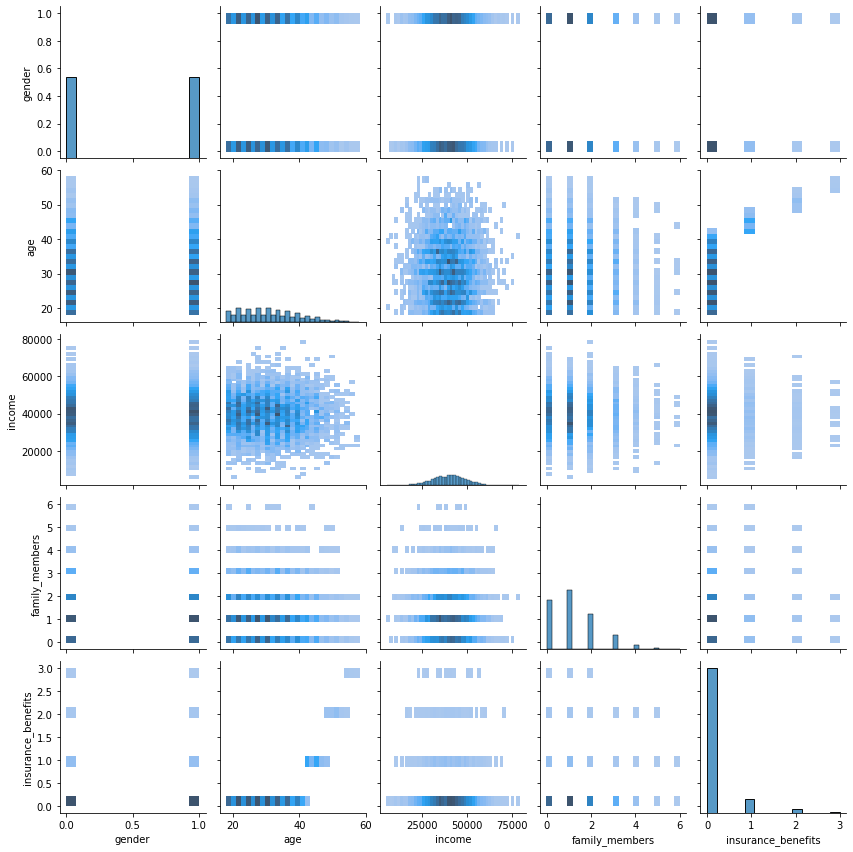

In [25]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.
Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.
Pruébalo para cuatro combinaciones de dos casos- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [26]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [27]:
def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    
    :param n: número de objetos para los que se buscan los vecinos más cercanos    
    :param k: número de vecinos más cercanos a devolver
    :param métrica: nombre de la métrica de distancia    """

    nbrs = NearestNeighbors(n_neighbors=n, radius=k, metric=metric).fit(df.loc[:,feature_names], df.loc[:,'insurance_benefits']) # <tu código aquí> 
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
    ¡Buen trabajo!, escribir funciones como esta, ayuda a la reutilización del código, la eficiencia del tiempo de desarrollo, la claridad del código y la escalabilidad del proyecto
</div>

Escalar datos.

In [28]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [29]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
1188,0.0,0.620690,0.332911,0.500000,0
604,1.0,0.344828,0.554430,0.166667,0
3277,0.0,0.362069,0.521519,0.000000,0
1905,1.0,0.448276,0.481013,0.333333,0
3897,0.0,0.431034,0.300000,0.000000,0


Ahora, vamos a obtener registros similares para uno determinado, para cada combinación

In [57]:
get_knn(df, 10, 5, 'euclidean')

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received,distance
10,1.0,25.0,36600.0,1.0,0.0,0.0,0.000000
1944,NaN,NaN,NaN,NaN,NaN,NaN,1.732051
1949,0.0,24.0,36600.0,0.0,0.0,0.0,NaN
2032,NaN,NaN,NaN,NaN,NaN,NaN,1.414214
2037,1.0,26.0,36600.0,0.0,0.0,0.0,NaN
3235,NaN,NaN,NaN,NaN,NaN,NaN,1.414214
3247,1.0,26.0,36600.0,2.0,0.0,0.0,NaN
4024,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
4039,1.0,25.0,36600.0,2.0,0.0,0.0,NaN


In [56]:
get_knn(df_scaled, 10, 5, 'euclidean')

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received,distance
10,1.0,0.431034,0.463291,0.166667,0.0,0.0,0.000000
759,NaN,NaN,NaN,NaN,NaN,NaN,0.017288
760,1.0,0.413793,0.462025,0.166667,0.0,0.0,NaN
1387,NaN,NaN,NaN,NaN,NaN,NaN,0.017288
1389,1.0,0.413793,0.464557,0.166667,0.0,0.0,NaN
2248,NaN,NaN,NaN,NaN,NaN,NaN,0.018840
2254,1.0,0.448276,0.455696,0.166667,0.0,0.0,NaN
4362,NaN,NaN,NaN,NaN,NaN,NaN,0.010127
4377,1.0,0.431034,0.473418,0.166667,0.0,0.0,NaN


In [32]:
get_knn(df, 10, 5, 'manhattan')

,gender,age,income,family_members,insurance_benefits,distance
10,1.0,25.0,36600.0,1.0,0.0,0.0
1506,NaN,NaN,NaN,NaN,NaN,3.0
1508,0.0,26.0,36600.0,0.0,0.0,NaN
2032,NaN,NaN,NaN,NaN,NaN,2.0
2037,1.0,26.0,36600.0,0.0,0.0,NaN
3235,NaN,NaN,NaN,NaN,NaN,2.0
3247,1.0,26.0,36600.0,2.0,0.0,NaN
4024,NaN,NaN,NaN,NaN,NaN,1.0
4039,1.0,25.0,36600.0,2.0,0.0,NaN


In [33]:
get_knn(df_scaled, 10, 5, 'manhattan')

,gender,age,income,family_members,insurance_benefits,distance
10,1.0,0.431034,0.463291,0.166667,0.0,0.000000
759,NaN,NaN,NaN,NaN,NaN,0.018507
760,1.0,0.413793,0.462025,0.166667,0.0,NaN
1387,NaN,NaN,NaN,NaN,NaN,0.018507
1389,1.0,0.413793,0.464557,0.166667,0.0,NaN
2248,NaN,NaN,NaN,NaN,NaN,0.024836
2254,1.0,0.448276,0.455696,0.166667,0.0,NaN
4362,NaN,NaN,NaN,NaN,NaN,0.010127
4377,1.0,0.431034,0.473418,0.166667,0.0,NaN


Respuestas a las preguntas

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

Si, lo afecta. Al escalar los datos obtenemos resultados diferentes. Esto probablemente se debe a que los pesos de cada variable cambian con el escalamiento, entonces cambiando los resultados obtenidos.

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 

Obtenemos los mismos datos, independiente de la métrica. Lo que parece importar para nuestra función y sus resultados es el dataset utilizado.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Excelentes respuestas, sólo es importante aclarar que depende del conjunto de datos utilizado y cómo se ha escalado. </div>

# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestación del seguro puede definirse como
$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [34]:
# сalcula el objetivo
df['insurance_benefits_received'] = np.where(df['insurance_benefits'] == 0,0,1)  
df_scaled['insurance_benefits_received'] = np.where(df_scaled['insurance_benefits'] == 0,0,1)

/tmp/ipykernel_55/1643240420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['insurance_benefits_received'] = np.where(df['insurance_benefits'] == 0,0,1)


In [35]:
# comprueba el desequilibrio de clases con value_counts()
df['insurance_benefits_received'].value_counts()

0    4429
1     556
Name: insurance_benefits_received, dtype: int64

In [36]:
df_scaled['insurance_benefits_received'].value_counts()

0    4429
1     556
Name: insurance_benefits_received, dtype: int64

In [37]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# si tienes algún problema con la siguiente línea, reinicia el kernel y ejecuta el cuaderno de nuevo    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusión')
    print(cm)

In [38]:
# generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [39]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'La probabilidad: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, df.shape[0]) 
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

La probabilidad: 0.00
F1: 0.00
Matriz de confusión
[[0.8884654 0.       ]
 [0.1115346 0.       ]]

La probabilidad: 0.11
F1: 0.11
Matriz de confusión
[[0.79237713 0.09608826]
 [0.0998997  0.0116349 ]]

La probabilidad: 0.50
F1: 0.18
Matriz de confusión
[[0.45275827 0.43570712]
 [0.0559679  0.0555667 ]]

La probabilidad: 1.00
F1: 0.20
Matriz de confusión
[[0.        0.8884654]
 [0.        0.1115346]]



Podemos que el valor de F1 aumenta con el valor de P hasta P=0.5, pero luego parece mantenerse constante. Si nos fijamos en la matriz de confusión de cada probabilidad, podemos ver que el modelo con mayor cantidad de valores verdaderos es el modelo con probabilidad P=0.11. Esto podría indicar que el mejor rango se encuentra entre P=0.11 y P=0.5.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Excelentes desarrollo de la tarea 2,podemos comprobar que al realizar un escalamiento de los datos obtenemos una métrica bastante buena para nuestro equilibrio armónico de recall y precision.
 </div>


# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades- $y$ — objetivo (un vector)- $\hat{y}$ — objetivo estimado (un vector)- $w$ — vector de pesos
La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [40]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = (np.linalg.inv(X.T.dot(X))).dot(X.T.dot(y)) # <tu código aquí>

    def predict(self, X):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)# <tu código aquí>
        y_pred = X.dot(self.weights) # <tu código aquí>
        
        return y_pred

In [41]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')   

In [42]:
rs = RandomState(seed=54321)

In [43]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[ 2.23481977e-02 -5.13277207e-02 -1.09533052e-05 -4.71435674e-02]
RMSE: 0.35
R2: 0.54


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
No olvides incluir tus conclusiones intermedias. Los resultados sugieren que el modelo de regresión lineal es bastante bueno para ajustarse a los datos, ya que el valor de RMSE es relativamente bajo y el valor de R2 es moderadamente alto.
</div>

# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [44]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [45]:
X = df_pn.to_numpy()

Generar una matriz aleatoria $P$.

In [46]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Comprobar que la matriz P sea invertible

In [47]:
np.linalg.inv(P)

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

No, la transformación funciono. Esta hace imposible adivinar los valores originales, pero podemos volver a obtenerlos si contamos con la matriz P.

¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

In [48]:
X.dot(P).dot(np.linalg.inv(P))

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-4.47363596e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-2.51586878e-12,  2.90000000e+01,  2.10000000e+04,
         9.52452315e-13],
       ...,
       [-1.92837871e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

Muestra los tres casos para algunos clientes- Datos originales
- El que está transformado- El que está invertido (recuperado)

In [49]:
print(X[3])
print()
print(X.dot(P)[3])
print()
print(X.dot(P).dot(np.linalg.inv(P))[3])

[0.00e+00 2.10e+01 4.17e+04 2.00e+00]

[ 5345.60393712 18803.22720286 15479.14837264 38663.06186284]

[-4.84498208e-12  2.10000000e+01  4.17000000e+04  2.00000000e+00]


Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?

Posiblemente por que aun existen limitantes en los metodos para recuperar los datos.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.Los el desarrollo de esta sección es correcto.Te aconsejo implementar los parámetros para eliminar la notación científica, estos harán que todo sea más claro de leer. 
</div>

## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

$$
w = X^{-1} y
$$

$$
w_P = P^{-1}X^{-1}y
$$

Esto quiere decir que ambos pesos se relacionan según la inversa de la matriz P, por lo que debemos usar una matriz que tenga inversa.

¿Cuáles serían los valores predichos con $w_P$? 

Considerando que solo hemos cambiado los valores de los features, los valores predichos con $w_P$ deberían ser los mismos que con $w$.

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?
Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuesta**

Peso original.

$$
w = (X^T X)^{-1} X^T y
$$

$$
w = X^{-1} X^{-T} X^T y
$$

$$
w = X^{-1} (X^{-T} X^T) y
$$

$$
w = X^{-1} I y
$$

$$
w = X^{-1} y
$$

Peso ofuscado:

$$
w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

$$
w_P = [(XP)^T (XP)]^{-1} (XP)^T y
$$

$$
w_P = (XP)^{-1} (XP)^{-T} (XP)^T Y
$$

$$
w_P = P^{-1} X^{-1} X^{-T} P^{-T} P^T X^T y
$$

$$
w_P = P^{-1} X^{-1} X^{-T} (P^{-T} P^T) X^T y
$$

$$
w_P = P^{-1} X^{-1} X^{-T} I X^T y
$$

$$
w_P = P^{-1} X^{-1} (X^{-T} X^T) y
$$

$$
w_P = P^{-1} X^{-1} I y
$$

$$
w_P = P^{-1} X^{-1} y
$$

<div class="alert alert-block alert-info">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Te dejo aquí un hint de los cálculos.</div>

Primera cosa que hacemos es demostrar que $w_P=P^{-1} w$. Para hacer esto utilizamos las propiedades de transformacion de matrices.

$$
w_P = ((XP)^T XP)^{-1} (XP)^T y 
$$

1. Aplicando $(𝐴𝐵)^𝑇 = 𝐵^𝑇𝐴^𝑇$ ,

$$
w_P = (P^T X^T XP)^{-1} P^T X^T y
$$

2. Luego $(𝐴𝐵)^{-1} = 𝐵^{-1} 𝐴^{-1}$ entonces,

$$
w_P = P^{-1} X^{-1} (X^T)^{-1} (P^T)^{-1} P^T X^T y
$$

3. Con $A^{-1}A = AA^{-1} = I$, y $ IA = A$ y $AI = A$ entonces,

$$
w_P = P^{-1} X^{-1} (X^T)^{-1} I X^T y
$$

$$
w_P = P^{-1} X^{-1} (X^T)^{-1} X^T y
$$

4. Entonces volvemos a $B^T A^T = (AB)^T$

$$
w_P = P^{-1} (X^T X)^{-1} X^T y
$$

5. Tenemos finalmente que,

$$
w_P = P^{-1} w
$$


## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.
Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.
Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.- <¡ tu comentario aquí !>
- Utiliza $XP$ como la nueva matriz de características

In [50]:
# Datos originales
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[ 2.17572657e-02 -5.02640927e-02 -1.07757551e-05 -4.10429299e-02]
RMSE: 0.36
R2: 0.55


In [51]:
# Datos ofuscados
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

XP = X.dot(P)

X_trainP, X_testP, y_trainP, y_testP = train_test_split(XP, y, test_size=0.3, random_state=rs)

lr = MyLinearRegression()

lr.fit(X_trainP, y_trainP)
print(lr.weights)

y_test_pred = lr.predict(X_testP)
eval_regressor(y_testP, y_test_pred)

[ 0.01887467 -0.08833916  0.03207297  0.02747681]
RMSE: 0.35
R2: 0.52


Como podemos ver, aunque lo pesos son diferentes, las métricas resultan similares en la mayoría de los casos. Podemos concluir que la ofuscación de datos no altera el análisis y predicción de los valores en gran medida.

# Conclusiones

Con un corto proceso EDA, se comienza a resolver cada tarea. Con estas completadas podemos asegurar que la ofuscación de datos no altera los resultados y conclusiones que se puedan obtener de un set de datos, ni tampoco lo hace en gran cantidad el método que se utilice para medir las distancias, aunque si cambia las distancias.

En la primera tarea encontramos los *k* vecinos más similares a otro cliente a elección. Utilizamos los métodos *euclidiano* y *manhattan* para medir las distancias de un set de datos escalado y el original. Aquí comprobamos que el escalamiento es el método . El escalamiento puede ser útil en otros casos.

En las tareas 3 y 4 se crea un modelo de regresión linear en base a la métrica F1. Se crea una matriz de ofuscación P que nos ayuda a mantener los datos codificados para seguridad de los usuarios.

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter.

- [x]  Jupyter Notebook está abierto
- [ ]  El código no tiene errores- [ ]  Las celdas están ordenadas de acuerdo con la lógica y el orden de ejecución
- [ ]  Se ha realizado la tarea 1
    - [ ]  Está presente el procedimiento que puede devolver k clientes similares para un cliente determinado
    - [ ]  Se probó el procedimiento para las cuatro combinaciones propuestas    - [ ]  Se respondieron las preguntas sobre la escala/distancia- [ ]  Se ha realizado la tarea 2
    - [ ]  Se construyó y probó el modelo de clasificación aleatoria para todos los niveles de probabilidad    - [ ]  Se construyó y probó el modelo de clasificación kNN tanto para los datos originales como para los escalados. Se calculó la métrica F1.- [ ]  Se ha realizado la tarea 3
    - [ ]  Se implementó la solución de regresión lineal mediante operaciones matriciales    - [ ]  Se calculó la RECM para la solución implementada- [ ]  Se ha realizado la tarea 4
    - [ ]  Se ofuscaron los datos mediante una matriz aleatoria e invertible P    - [ ]  Se recuperaron los datos ofuscados y se han mostrado algunos ejemplos    - [ ]  Se proporcionó la prueba analítica de que la transformación no afecta a la RECM    - [ ]  Se proporcionó la prueba computacional de que la transformación no afecta a la RECM- [ ]  Se han sacado conclusiones

# Apéndices

## Apéndice A: Escribir fórmulas en los cuadernos de Jupyter

Puedes escribir fórmulas en tu Jupyter Notebook utilizando un lenguaje de marcado proporcionado por un sistema de publicación de alta calidad llamado $\LaTeX$ (se pronuncia como "Lah-tech"). Las fórmulas se verán como las de los libros de texto.

Para incorporar una fórmula a un texto, pon el signo de dólar (\\$) antes y después del texto de la fórmula, por ejemplo: $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Si una fórmula debe estar en el mismo párrafo, pon el doble signo de dólar (\\$\\$) antes y después del texto de la fórmula, por ejemplo:
$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

El lenguaje de marcado de [LaTeX](https://es.wikipedia.org/wiki/LaTeX) es muy popular entre las personas que utilizan fórmulas en sus artículos, libros y textos. Puede resultar complicado, pero sus fundamentos son sencillos. Consulta esta [ficha de ayuda](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) (materiales en inglés) de dos páginas para aprender a componer las fórmulas más comunes.

## Apéndice B: Propiedades de las matrices

Las matrices tienen muchas propiedades en cuanto al álgebra lineal. Aquí se enumeran algunas de ellas que pueden ayudarte a la hora de realizar la prueba analítica de este proyecto.

<table>
<tr>
<td>Distributividad</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>No conmutatividad</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propiedad asociativa de la multiplicación</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propiedad de identidad multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilidad de la transposición de un producto de matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
¡Hola! 😃

Quiero felicitarte por tu proyecto. Está muy bien realizado y completo. Respondiste correctamente la mayoria de las preguntas y realizaste correctamente las tareas prácticas.
    
Sin embargo hay un par de puntos que podemos mejorar: 
    - Trabajaremos en la exploración de los datos para revisar valores duplicados, tipos de datos y valores atípicos.

¡Saludos! 🤗
</div>

<div class="alert alert-block alert-success">    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Qué gran trabajo has hecho!  &#128077;  Podemos aprobar el proyecto. <br>
Has demostrado un excelente conocimiento en la construcción de modelos, al eliminar variables innecesarias y procesar  los datos antes de entrenar los modelos. <br>
<br>Quiero felicitarte por un trabajo excepcional y por la calidad de tu análisis. Te animo a que sigas aprendiendo y desafiando tu potencial en los próximos sprints. Estoy seguro de que tus habilidades y conocimientos serán valiosos en el futuro y te permitirán abordar problemas cada vez más complejos con éxito.
</div>